In [16]:
# K-Nearest Neighbors on Diabetes Dataset

# importing all the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import MinMaxScaler


# loading the dataset
df = pd.read_csv("diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
# data Preprocessing

# Columns where 0 is invalid
# for an example in these feature or attributes 0 does'nt hold any meaning.
columns_with_invalid_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0s with NaN
df[columns_with_invalid_zeros] = df[columns_with_invalid_zeros].replace(0, np.nan)

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
df[columns_with_invalid_zeros] = imputer.fit_transform(df[columns_with_invalid_zeros])


In [18]:
# feature scaling and train-test split

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [19]:
# K-NN classifier for different values of k

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


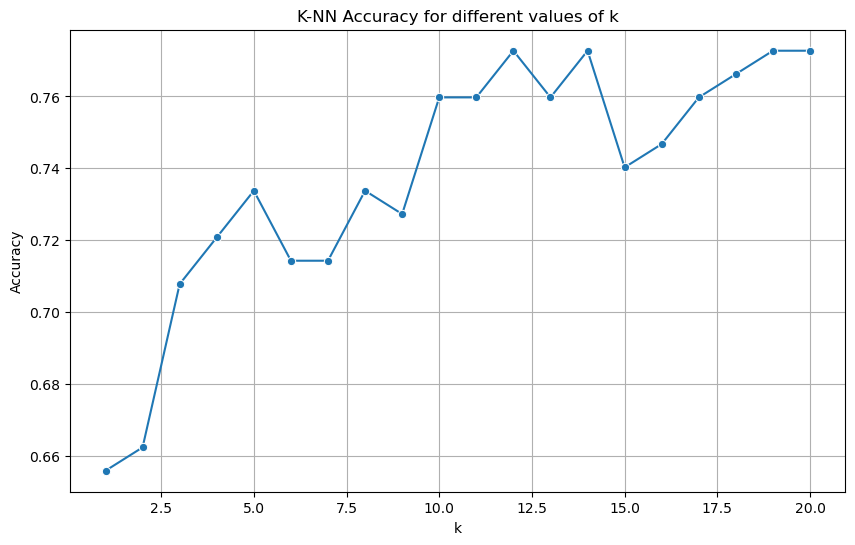



Best k: 12 with Accuracy: 0.7727


In [20]:
# plotting Accuracy vs k
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=accuracies, marker='o')
plt.title("K-NN Accuracy for different values of k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Best k
best_k = k_values[np.argmax(accuracies)]
print(f"\n\nBest k: {best_k} with Accuracy: {max(accuracies):.4f}")


In [21]:
# feature scaling and train-test split

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# normalizing features

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [22]:
# K-NN classifier for different values of k

k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


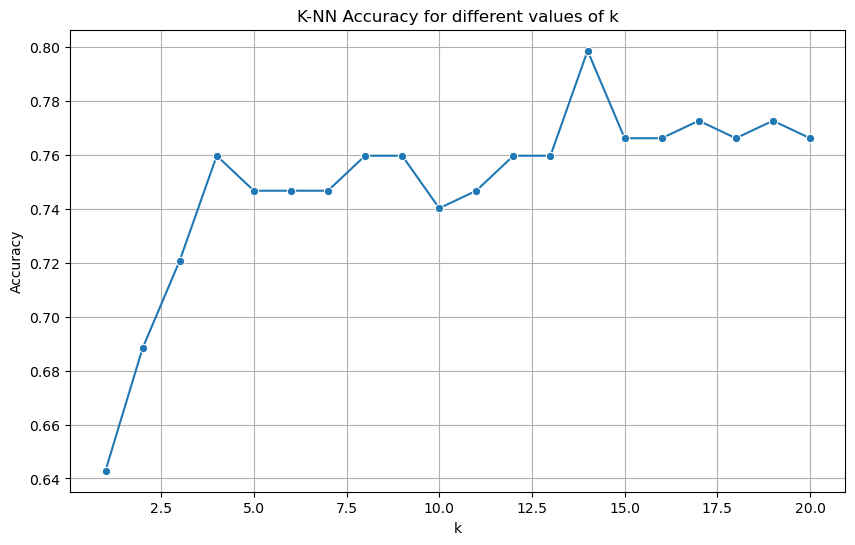



Best k: 14 with Accuracy: 0.7987


In [23]:
# plotting Accuracy vs k
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=accuracies, marker='o')
plt.title("K-NN Accuracy for different values of k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Best k
best_k = k_values[np.argmax(accuracies)]
print(f"\n\nBest k: {best_k} with Accuracy: {max(accuracies):.4f}")


### -> As we can see that when we transform our datset using Standard Scaler we got the Acuuracy as 0.77

### -> But for Normalization we are getting Accuracy as approx 0.8

### -> So with this we can say that for this dataset normalization is best suitable. Hence we are proceeding with Normalization K - value

In [24]:
# Final Evaluation with Best k

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)
print("\n\nClassification Report:\n", class_report)


Confusion Matrix:
 [[89 10]
 [21 34]]


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.90      0.85        99
           1       0.77      0.62      0.69        55

    accuracy                           0.80       154
   macro avg       0.79      0.76      0.77       154
weighted avg       0.80      0.80      0.79       154



In [25]:
# manual Input and Prediction with User-friendly Output

input_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                  'Insulin', 'BMI', 'Pedigree', 'Age']

print("Enter the following values:")
user_input = []
for feature in input_features:
    value = float(input(f"{feature}: "))
    user_input.append(value)

# Convert to DataFrame to preserve feature names( so that by doing this we wont get warning message)
user_df = pd.DataFrame([user_input], columns=input_features)

# Normalize(MinMaxScaling)
user_array_scaled = scaler.transform(user_df)

# Predict
prediction = best_knn.predict(user_array_scaled)[0]
result = "Diabetic" if prediction == 1 else "Not Diabetic"

print(f"\nPrediction Result: {result}")


Enter the following values:

Prediction Result: Not Diabetic


In [53]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [58]:
# Step 2: Load the Wine Dataset
df = pd.read_csv("winequality-red.csv",sep=';')
print("Initial Dataset Shape:", df.shape)
df.head()
df.shape

Initial Dataset Shape: (1599, 12)


(1599, 12)

In [59]:
# Step 3: Drop Unnecessary Columns
#df.drop(columns=["Id"], inplace=True)

In [60]:
# Step 4: Convert 'quality' into Categorical Classes(DIS)
# Binning wine quality into categories (low: 3-5, medium: 6, high: 7-8)
def quality_label(value):
    if value <= 5:
        return 0  # Low
    elif value == 6:
        return 1  # Medium
    else:
        return 2  # High


In [61]:
df["quality_label"] = df["quality"].apply(quality_label)
df.drop(columns=["quality"], inplace=True)

In [88]:
# Step 5: Feature Matrix and Target
X = df.drop("quality_label", axis=1)
y = df["quality_label"]

# Step 6: Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 7: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

In [89]:
# K-NN classifier for different values of k

k_values = range(4, 33)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


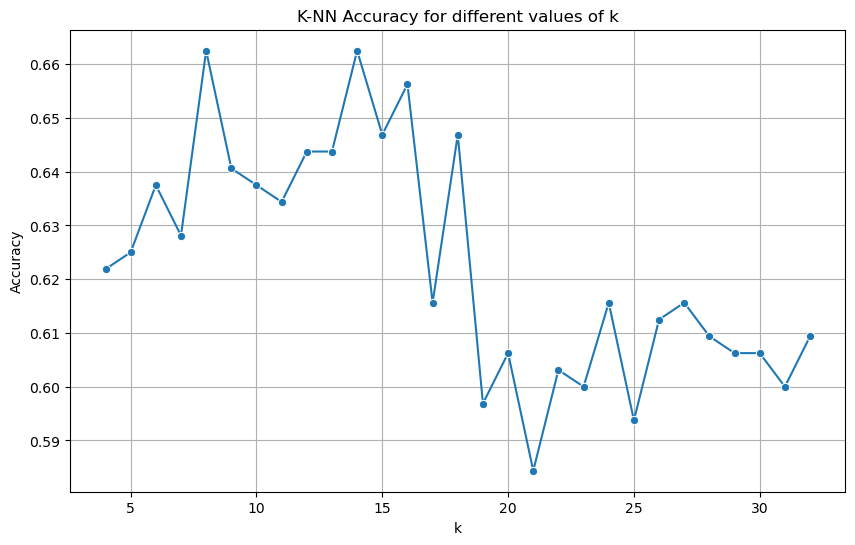



Best k: 8 with Accuracy:0.6625


In [90]:
# plotting Accuracy vs k
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=accuracies, marker='o')
plt.title("K-NN Accuracy for different values of k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Best k
best_k = k_values[np.argmax(accuracies)]
print(f"\n\nBest k: {best_k} with Accuracy:{max(accuracies):.4f}")


In [91]:
# Step 5: Feature Matrix and Target
X = df.drop("quality_label", axis=1)
y = df["quality_label"]


scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)


# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [92]:
# K-NN classifier for different values of k
k_values = range(4, 33)
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))


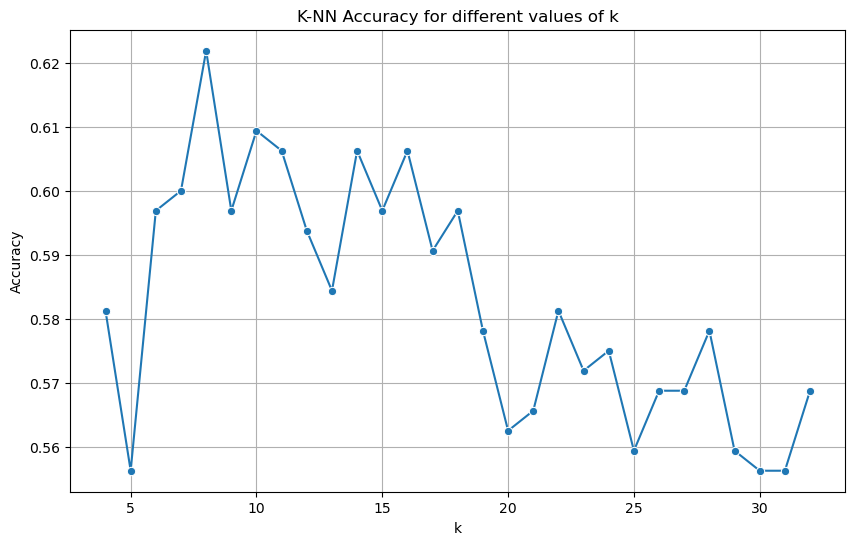



Best k: 8 with Accuracy:0.6219


In [93]:
# plotting Accuracy vs k
plt.figure(figsize=(10, 6))
sns.lineplot(x=k_values, y=accuracies, marker='o')
plt.title("K-NN Accuracy for different values of k")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

# Best k
best_k = k_values[np.argmax(accuracies)]
print(f"\n\nBest k: {best_k} with Accuracy:{max(accuracies):.4f}")


In [94]:
# Final Evaluation with Best k

best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
y_pred = best_knn.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:\n", conf_matrix)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["Low", "Medium", "High"]))


Confusion Matrix:
 [[111  30   0]
 [ 54  69   9]
 [  4  24  19]]

Classification Report:
              precision    recall  f1-score   support

         Low       0.66      0.79      0.72       141
      Medium       0.56      0.52      0.54       132
        High       0.68      0.40      0.51        47

    accuracy                           0.62       320
   macro avg       0.63      0.57      0.59       320
weighted avg       0.62      0.62      0.61       320



In [77]:
# Manual Input and Prediction

input_features = [
    "fixed acidity", "volatile acidity", "citric acid", "residual sugar",
    "chlorides", "free sulfur dioxide", "total sulfur dioxide", "density",
    "pH", "sulphates", "alcohol"
]

print("Enter the following values for the wine sample:")
user_input = []
for feature in input_features:
    val = input(f"{feature}: ")
    try:
        user_input.append(float(val))
    except ValueError:
        print(f"Invalid input for {feature}. Please enter a numeric value.")
        break

# Proceed only if all inputs are collected
if len(user_input) == len(input_features):
    # Convert to DataFrame to preserve feature names (avoids warning)
    user_df = pd.DataFrame([user_input], columns=input_features)

    # Apply scaling using the same scaler used during training
    user_scaled = scaler.transform(user_df)

    # Predict using the final trained model
    prediction = best_knn.predict(user_scaled)[0]

    # Map prediction to quality label
    result_map = {0: "Low", 1: "Medium", 2: "High"}
    print(f"\nPredicted Wine Quality: {result_map[prediction]}")


Enter the following values for the wine sample:

Predicted Wine Quality: Medium
